# Deprecated

## Reason
Old version that has been superseded

# Predict interval boundaries on kss audio

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import IPython
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

font_path = '/Users/dev/Fonts/Noto_Sans_KR/NotoSansKR-Regular.otf'
k_prop = mfm.FontProperties(fname=font_path)
plt.style.use('dark_background')

# from IPython.display import display, Code, Audio

def show_file_source(f):
    display(IPython.display.Code(filename=f))



## Data Preparation
Create features


## Audio Info

Informational:
* Consonant Phonemes duration 25-50 msec
* Vowel Phonemes duration 50-100+ msec


## Character and Syllable Chunk Markers

In [6]:
from marker_df import MarkerDf
# show_file_source('marker_df.py')

chunk_dir = 'data/korean-single-speaker/kss_chunks'

markers_char = MarkerDf.read_csv(f'{chunk_dir}/chunk_char.csv')
markers_syl = MarkerDf.read_csv(f'{chunk_dir}/chunk_syl.csv')

import pandas as pd
from IPython.display import display


class MarkerDf:

    @classmethod
    def read_csv(cls, csv_f):
        return cls(pd.read_csv(csv_f))

    def __init__(self, df):
        self.df = df

    def intervals(self):
        return self.df['stop'] - self.df['start']

    def display(self):
        display(self.df)

    def audio_files(self):
        return self.df['audio'].unique()

    def markers_by_file(self, cols=None):
        if cols == None:
            cols = self.df.columns
        dict = {}
        for f in self.audio_files():
            col_dict = {}
            for col in cols:
                col_dict[col] = self.df[self.df['audio'] == f][col].values
            dict[f] = col_dict
        return dict

'foo'

## Event Marker Analysis

### Event Marker Statistics

In [22]:
print('Character DF')
display(markers_char.df)
display(markers_char.df.describe())

print('Syllable DF')
display(markers_syl.df)
display(markers_syl.df.describe())


Character DF
Syllable DF
     Describe()


,char,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,ᄀ,0.14298,0.17326,data/korean-single-speaker/kss/1/1_0000.wav
2,ᅳ,0.17326,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
3,ᆫ,0.25143,0.30110,data/korean-single-speaker/kss/1/1_0000.wav
4,ᅳ,0.30110,0.39456,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
128,ᅵ,1.78153,1.83571,data/korean-single-speaker/kss/1/1_0003.wav
129,ᆫ,1.83571,1.97293,data/korean-single-speaker/kss/1/1_0003.wav
130,ᄃ,1.97293,1.98396,data/korean-single-speaker/kss/1/1_0003.wav
131,ᅡ,1.98396,2.19790,data/korean-single-speaker/kss/1/1_0003.wav


markers_char.df.describe()

,start,stop
count,133.000000,133.000000
mean,1.417308,1.504264
std,0.998314,1.009050
min,0.000000,0.042620
25%,0.592430,0.706540
50%,1.213770,1.279210
75%,2.197060,2.284610
max,3.713270,3.972180


,syl,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,그,0.14298,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
2,는,0.25143,0.49473,data/korean-single-speaker/kss/1/1_0000.wav
3,0,0.49473,0.52397,data/korean-single-speaker/kss/1/1_0000.wav
4,괜,0.52397,0.71846,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
67,이,1.45550,1.53270,data/korean-single-speaker/kss/1/1_0003.wav
68,아,1.53270,1.75352,data/korean-single-speaker/kss/1/1_0003.wav
69,낀,1.75352,1.97293,data/korean-single-speaker/kss/1/1_0003.wav
70,다,1.97293,2.19790,data/korean-single-speaker/kss/1/1_0003.wav


,start,stop
count,72.000000,72.000000
mean,1.352590,1.513219
std,1.005698,1.029844
min,0.000000,0.042620
25%,0.517165,0.717580
50%,1.207020,1.354050
75%,2.053795,2.197270
max,3.713270,3.972180


#### Intervals

In [3]:
print('Char Interval statistics')
print(markers_char.intervals().describe())
print('')
print('Syl Interval statistics')
print(markers_syl.intervals().describe())


Char Interval statistics
count    133.000000
mean       0.086957
std        0.061730
min        0.006800
25%        0.044530
50%        0.073060
75%        0.113300
max        0.312600
dtype: float64

Syl Interval statistics
count    72.000000
mean      0.160629
std       0.079553
min       0.012280
25%       0.100855
50%       0.158450
75%       0.219373
max       0.336930
dtype: float64


## Event Marker Data

Dictionary of audio_file -> list of event marker times.

In [4]:
markers_char.display()
markers_syl.display()

,char,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,ᄀ,0.14298,0.17326,data/korean-single-speaker/kss/1/1_0000.wav
2,ᅳ,0.17326,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
3,ᆫ,0.25143,0.30110,data/korean-single-speaker/kss/1/1_0000.wav
4,ᅳ,0.30110,0.39456,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
128,ᅵ,1.78153,1.83571,data/korean-single-speaker/kss/1/1_0003.wav
129,ᆫ,1.83571,1.97293,data/korean-single-speaker/kss/1/1_0003.wav
130,ᄃ,1.97293,1.98396,data/korean-single-speaker/kss/1/1_0003.wav
131,ᅡ,1.98396,2.19790,data/korean-single-speaker/kss/1/1_0003.wav


,syl,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,그,0.14298,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
2,는,0.25143,0.49473,data/korean-single-speaker/kss/1/1_0000.wav
3,0,0.49473,0.52397,data/korean-single-speaker/kss/1/1_0000.wav
4,괜,0.52397,0.71846,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
67,이,1.45550,1.53270,data/korean-single-speaker/kss/1/1_0003.wav
68,아,1.53270,1.75352,data/korean-single-speaker/kss/1/1_0003.wav
69,낀,1.75352,1.97293,data/korean-single-speaker/kss/1/1_0003.wav
70,다,1.97293,2.19790,data/korean-single-speaker/kss/1/1_0003.wav


In [5]:
print(markers_char.markers_by_file(['stop']))
print(markers_syl.markers_by_file(['stop']))
# Below is deprecated
char_event_stop_dict = {}
syl_event_stop_dict = {}
audio_files_char = markers_char.df['audio'].unique()
audio_files_syl = markers_syl.df['audio'].unique()

# List of the unique audio file path/names
audio_files = np.unique(np.concatenate((audio_files_char, audio_files_syl)))

for audio_file in audio_files:
    char_stop_events = markers_char.df[markers_char.df['audio'] == audio_file]['stop'].values
    syl_stop_events = markers_syl.df[markers_syl.df['audio'] == audio_file]['stop'].values
    char_event_stop_dict[audio_file] = char_stop_events
    syl_event_stop_dict[audio_file] = syl_stop_events

print(char_event_stop_dict)
print(syl_event_stop_dict)

{'data/korean-single-speaker/kss/1/1_0000.wav': {'stop': array([0.14298, 0.17326, 0.25143, 0.3011 , 0.39456, 0.49473, 0.52397,
       0.5717 , 0.66385, 0.71846, 0.73074, 0.7928 , 0.86105, 0.8947 ,
       0.94568, 0.98747, 1.00429, 1.05658, 1.12825, 1.20548, 1.24674,
       1.27921, 1.33187, 1.35667, 1.50828, 1.54819, 1.5778 , 1.73609,
       2.04869, 2.15518, 2.28461, 2.3443 , 2.37857, 2.45163, 2.53042,
       2.55297, 2.61609, 2.63233, 2.68239, 2.7029 , 2.76329, 2.86374,
       2.8825 , 2.95272, 3.14772, 3.1583 , 3.4173 , 3.52653])}, 'data/korean-single-speaker/kss/1/1_0001.wav': {'stop': array([0.0927 , 0.12765, 0.17218, 0.2192 , 0.2473 , 0.41173, 0.50644,
       0.57461, 0.59243, 0.64042, 0.70654, 0.81835, 0.83326, 0.95153,
       1.09444, 1.11834, 1.20856, 1.37623, 1.59665, 1.64288, 1.76991,
       1.89271, 1.99178, 2.06911, 2.15357, 2.19706, 2.26984, 2.40939,
       2.50919, 2.78858, 2.85241, 2.89864, 2.99798, 3.0465 , 3.09567,
       3.16021, 3.20729, 3.33246, 3.50541, 3.52027, 3

## Audio Data

* X - audio wav file
* y - time to next boundary
  * Given X and the event stop times
DF

i_start, i_stop, i_midpoint, event_offset, audio_dur, audio

### Windowing

#### Window Size
The window size (in seconds) is used to segment the audio file data into sections of identical length (the window size)

#### Window Stride
The window stride (in seconds) determines when each window starts.
* when stride == size then the windows do not overlap
* when stride < size then the windows will have overlapping audio sections
* when stride > size there there will be audio gaps between windows


In [6]:
# window_size_s = 0.3
# window_stride_s = 0.005


## Feature Prep

X is slices of audio with window_size_s duration

y is valid_event boolean

TODO: Normalize the data across audio files


,start,stop,syl,audio,value
0,0.00000,0.14298,0,data/korean-single-speaker/kss/1/1_0000.wav,False
1,0.14298,0.25143,그,data/korean-single-speaker/kss/1/1_0000.wav,True
2,0.25143,0.49473,는,data/korean-single-speaker/kss/1/1_0000.wav,True
3,0.49473,0.52397,0,data/korean-single-speaker/kss/1/1_0000.wav,False
4,0.52397,0.71846,괜,data/korean-single-speaker/kss/1/1_0000.wav,True
5,0.71846,0.73074,0,data/korean-single-speaker/kss/1/1_0000.wav,False
6,0.73074,0.89470,찮,data/korean-single-speaker/kss/1/1_0000.wav,True
7,0.89470,0.98747,은,data/korean-single-speaker/kss/1/1_0000.wav,True
8,0.98747,1.00429,0,data/korean-single-speaker/kss/1/1_0000.wav,False
9,1.00429,1.20548,척~,data/korean-single-speaker/kss/1/1_0000.wav,True


a.to_rms size: 2430, reduced 2429.984375
audio length: 155519
a.to_rms size: 2430, reduced 2429.984375
y shape: (155519,)
y_rms shape: (1, 2430)
mfcc shape: (12, 2430)
rms shape: (1, 2430)


/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


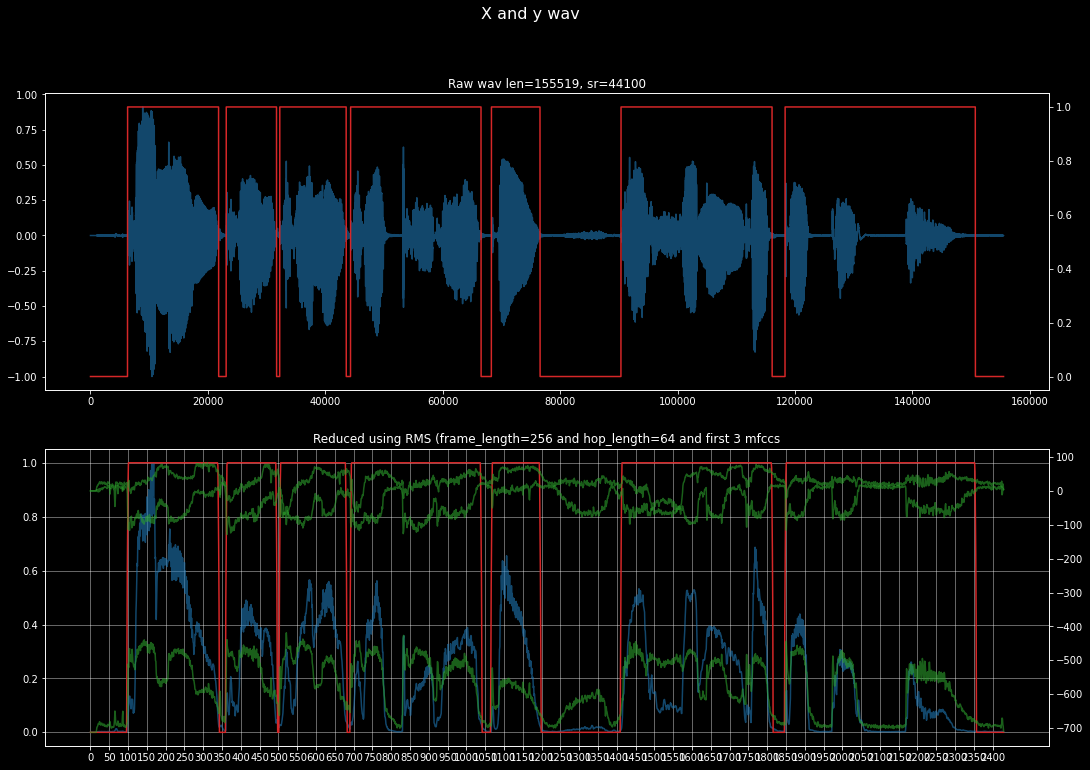

In [7]:
from audio import Audio
# Explore the data using the Audio Class

audio_path_ = 'data/korean-single-speaker/kss/1/1_0000.wav'
audio_syl_df_ = markers_syl.df.loc[markers_syl.df['audio'] == audio_path_,['start', 'stop', 'syl', 'audio']]
audio_syl_df_['value'] = audio_syl_df_['syl'] != '0'
display(audio_syl_df_)

a = Audio(audio_path_, n_fft=256, n_hops=4)
print(f'audio length: {a.size}')

y = a.val_from_interval(audio_syl_df_, missing_val=False)
y_rms = a.to_rms(y.astype(float))

print(f'y shape: {y.shape}')
print(f'y_rms shape: {y_rms.shape}')
print(f'mfcc shape: {a.mfcc.shape}')
print(f'rms shape: {a.rms.shape}')


fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18,12))
fig.suptitle('X and y wav', fontsize=16)

ax1.set_title(f'Raw wav len={a.size}, sr={a.sr}')
ax1.plot(a.wav, color='tab:blue', alpha=0.6)
ax1a = ax1.twinx()
ax1a.plot(y, color='tab:red', alpha=1)

ax2.set_title(f'Reduced using RMS (frame_length={a.n_fft} and hop_length={a.hop_length} and first 3 mfccs')
ax2.plot(a.rms.flatten(), color='tab:blue', alpha=0.6)
ax2a = ax2.twinx()
ax2a.plot(a.mfcc[0], color='tab:green', alpha=0.6)
ax2a.plot(a.mfcc[1], color='tab:green', alpha=0.6)
ax2a.plot(a.mfcc[2], color='tab:green', alpha=0.6)

ax2.plot(y_rms.flatten(), color='tab:red', alpha=1)
ax2.grid(alpha=0.5)
ax2.xaxis.set_ticks(np.arange(0, len(a.rms.flatten()), 50))

plt.show()

/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
Audio[WARNING]: Modifying input wav from size 175173 to 175168
Audio[INFO]: change in number of samples: -5 [should be less than hop length: 64]
Audio[WARNING]: Modifying input wav from size 77573 to 77568
Audio[INFO]: change in number of samples: -5 [should be less than hop length: 64]
Audio[WARNING]: Modifying input wav from size 101762 to 101760
Audio[INFO]: change in number of samples: -2 [should be less than hop length: 64]


a.to_rms size: 2430, reduced 2429.984375
a.to_rms size: 2737, reduced 2736.984375
a.to_rms size: 1212, reduced 1211.984375
a.to_rms size: 1590, reduced 1589.984375
all audio length (wav samples) 510012, duration: 11.564897959183673
wav shape: (510012,)
y shape: (510012,)
y_rms shape: (1, 7969)
mfcc shape: (12, 7969)
rms shape: (1, 7969)


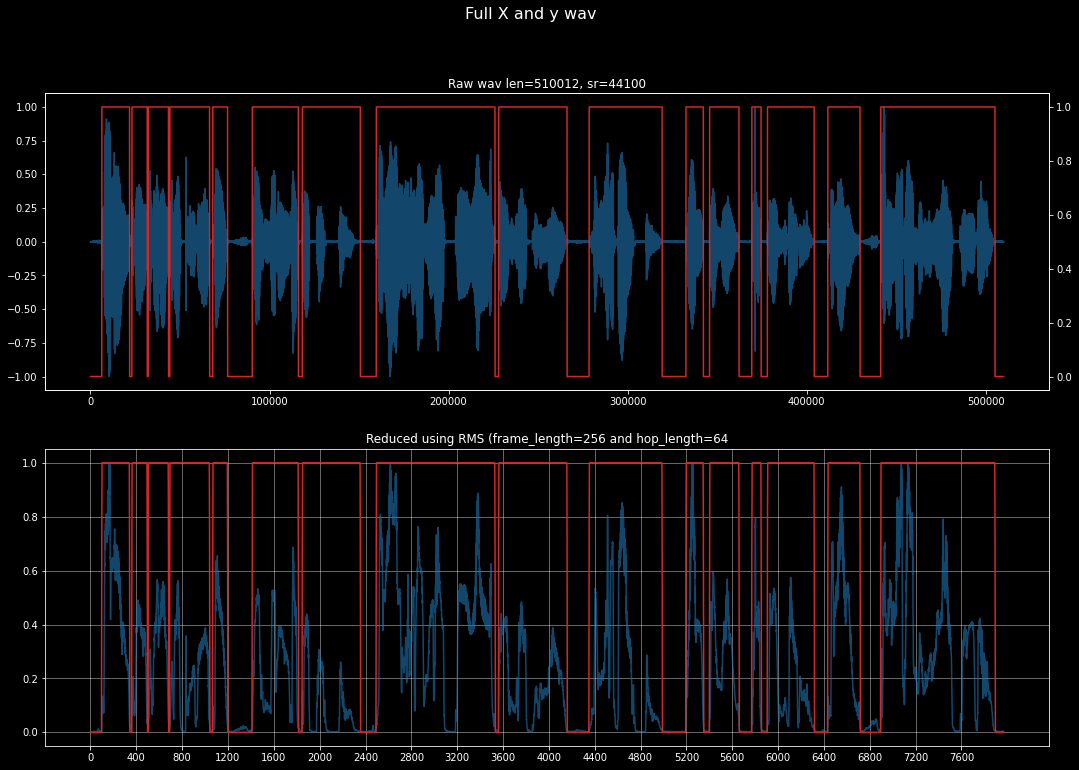

In [8]:
from audio_plexer import AudioPlexer
n_fft = 256
n_hops = 4

ap = AudioPlexer(audio_files, n_fft=n_fft, n_hops=n_hops)
print(f'all audio length (wav samples) {ap.size}, duration: {ap.size/ap.sr}')
# display(audio_syl_df_)
y = ap.val_from_interval(markers_syl.df, missing_val=False)
y_rms = ap.to_rms(y.astype(float))
y_mfcc = ap.mfcc()

print(f'wav shape: {ap.wav().shape}')
print(f'y shape: {y.shape}')
print(f'y_rms shape: {y_rms.shape}')
print(f'mfcc shape: {y_mfcc.shape}')
print(f'rms shape: {ap.rms().shape}')


fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18,12))
fig.suptitle('Full X and y wav', fontsize=16)

ax1.set_title(f'Raw wav len={ap.size}, sr={ap.sr}')
ax1.plot(ap.wav(), color='tab:blue', alpha=0.6)
ax1a = ax1.twinx()
ax1a.plot(y, color='tab:red', alpha=1)
ax2.set_title(f'Reduced using RMS (frame_length={a.n_fft} and hop_length={a.hop_length}')
ax2.plot(ap.rms().flatten(), color='tab:blue', alpha=0.6)
ax2.plot(y_rms.flatten(), color='tab:red', alpha=1)

ax2a.plot(y_mfcc[0], color='tab:green', alpha=0.6)
ax2a.plot(y_mfcc[1], color='tab:green', alpha=0.6)
ax2a.plot(y_mfcc[2], color='tab:green', alpha=0.6)
ax2.grid(alpha=0.5)
ax2.xaxis.set_ticks(np.arange(0, len(ap.rms().flatten()), 400))
plt.show()

## Model: SVR (Support Vector Regression)

Use SVR to predict whether the audio is silence or speech

### Using sliding window over RMS of wav

In [47]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
# from pipegraph.base import PipeGraph
from sklearn.model_selection import GridSearchCV



# Get X and y
ap = AudioPlexer(audio_files)
X_svr_pts = ap.rms().flatten()
y_svr_raw = ap.val_from_interval(markers_syl.df, missing_val=False)
y_svr_pts = ap.to_rms(y_svr_raw.astype(float))

# Hyperparameters

# TODO: Tune for these
sw_size = 128 # 128//2
sw_offset = 64 # 96//2


# best params
# 'svr__degree': [2, 3, 4], # not used for rbf
# 'svr__kernel': ['rbf'] out of ['rbf', 'poly', 'linear'],
# 'svr__gamma': ['auto'] # out of [0.1, 'scale', 'auto'], BUT, hand tuning seems to work better
param_grid = {
    # svr
    'svr__kernel': ['rbf'],
    'svr__C': [50],
    'svr__gamma': [0.2],
    'svr__epsilon': [0.1],
    'svr__verbose': [3],
    #svc
    # 'svc__kernel': ['rbf'],
    # 'svc__C': [50],
    # 'svc__gamma': [0.2],
    # 'svc__verbose': [3]
}

# pipegraph connections

# Models and processing
svr_rbf = SVR()
# svc_rbf = SVC()


connections = {}

steps = [('svr', svr_rbf)]


# Get X and y 2
X_svr, y_svr = ap.sliding_window_features(X_svr_pts, y_svr_pts, window=sw_size, offset=sw_offset)

pipe = Pipeline(steps=steps)


search = GridSearchCV(pipe, param_grid, n_jobs=-2)


# y_svr_int = y_svr.astype(int)
search.fit(X_svr, y_svr)
print(search.best_params_)
y_svr_pred_vals = search.predict(X_svr)

/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
Audio[WARNING]: Modifying input wav from size 175173 to 175168
Audio[INFO]: change in number of samples: -5 [should be less than hop length: 64]
Audio[WARNING]: Modifying input wav from size 77573 to 77568
Audio[INFO]: change in number of samples: -5 [should be less than hop length: 64]
Audio[WARNING]: Modifying input wav from size 101762 to 101760
Audio[INFO]: change in number of samples: -2 [should be less than hop length: 64]


a.to_rms size: 2430, reduced 2429.984375
a.to_rms size: 2737, reduced 2736.984375
a.to_rms size: 1212, reduced 1211.984375
a.to_rms size: 1590, reduced 1589.984375
[LibSVM]{'svr__C': 50, 'svr__epsilon': 0.1, 'svr__gamma': 0.2, 'svr__kernel': 'rbf', 'svr__verbose': 3}


## Post Processing

### Evaluating Results

In [10]:
# TODO: Move these into a class
def pred_threshold(pred_vals, thresh=0.5):
    return np.where(pred_vals > thresh, True, False)


def get_events_from_preds(preds):
    pred_pad = np.pad(preds, (0,0), 'minimum')


y_svr_pred = pred_threshold(y_svr_pred_vals, 0.5)

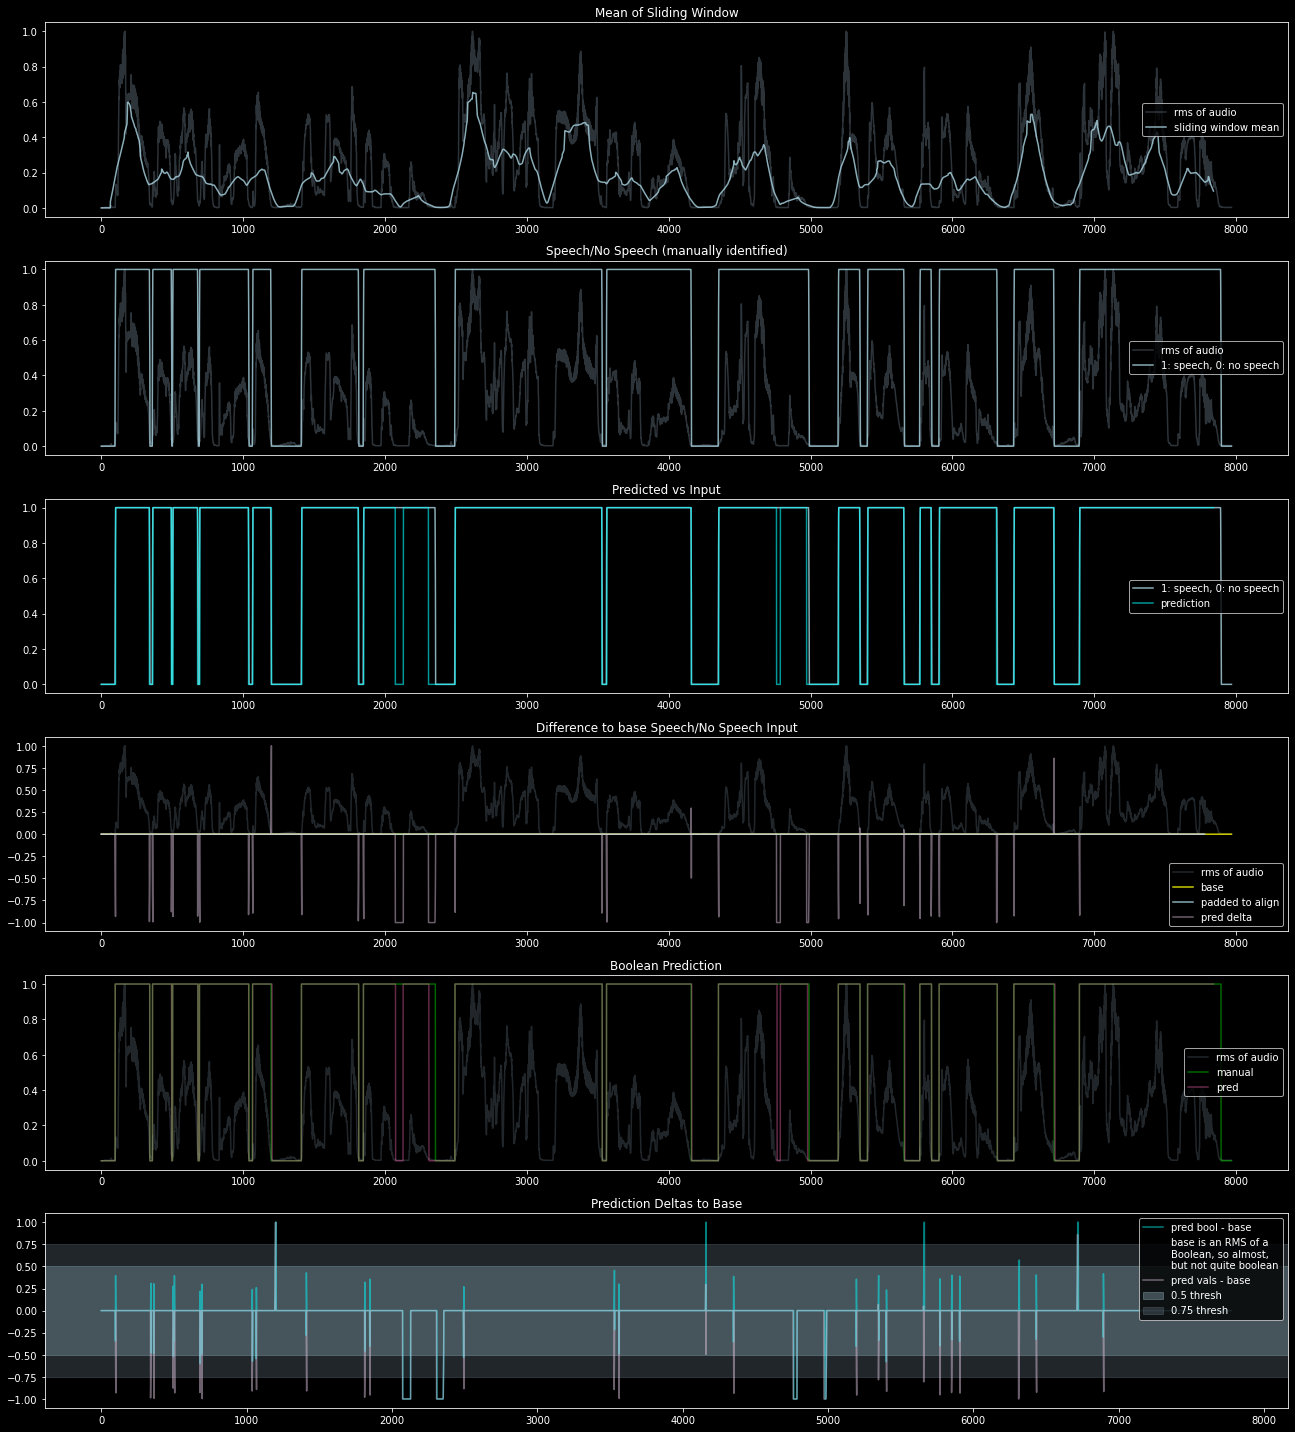

In [46]:
y_base = y_svr_pts.flatten()

def align(y, offset):
    return np.pad(y, (offset, 0), 'minimum')

def delta(y1, y2, y1_offset, y2_offset):
    min_len = min(len(y1), len(y2))
    return align(y1, y1_offset)[0:min_len] - align(y2, y2_offset)[0:min_len]

def speech_base_delta(y, offset):
    return delta(y, y_base, offset, 0)


fig, axs  = plt.subplots(6, 1, figsize=(18,20))
# fig.suptitle('RMS X and y', fontsize=14)

axs[0].set_title(f'Mean of Sliding Window')
axs[0].plot(X_svr_pts, color='slategray', alpha=0.4, label='rms of audio')
axs[0].plot(np.mean(align(X_svr, sw_offset), axis=1), color='lightblue', alpha=0.8, label='sliding window mean')
axs[0].legend(loc='center right')

axs[1].set_title(f'Speech/No Speech (manually identified)')
axs[1].plot(X_svr_pts, color='slategray', alpha=0.4, label='rms of audio')
axs[1].plot(y_base, color='lightblue', alpha=0.8, label='1: speech, 0: no speech')
axs[1].legend(loc='center right')

axs[2].set_title(f'Predicted vs Input')
axs[2].plot(y_base, color='lightblue', alpha=0.8, label='1: speech, 0: no speech')
axs[2].plot(align(y_svr_pred_vals, sw_offset), color='cyan', alpha=0.6, label='prediction')
axs[2].legend(loc='center right')

axs[3].set_title(f'Difference to base Speech/No Speech Input')
axs[3].plot(X_svr_pts, color='slategray', alpha=0.3, label='rms of audio')
axs[3].plot(y_base-y_base, color='yellow', alpha=0.8, label='base')
axs[3].plot(speech_base_delta(y_svr, sw_offset), color='lightblue', alpha=0.8, label="padded to align")
axs[3].plot(speech_base_delta(y_svr_pred_vals, sw_offset), color='thistle', alpha=0.5, label='pred delta')
axs[3].legend(loc='lower right')

axs[4].set_title(f'Boolean Prediction')
axs[4].plot(X_svr_pts, color='slategray', alpha=0.3, label='rms of audio')
axs[4].plot(1*pred_threshold(y_base, 0.5), color='lime', alpha=0.4, label='manual')
axs[4].plot(align(1*y_svr_pred, sw_offset), color='hotpink', alpha=0.4, label='pred')
axs[4].legend(loc='center right')

axs[5].set_title(f'Prediction Deltas to Base')
axs[5].plot(delta(1*y_svr_pred, y_base, sw_offset, 0), color='cyan', alpha=0.5, label='pred bool - base')
axs[5].plot([], [], ' ', label='base is an RMS of a\nBoolean, so almost,\nbut not quite boolean')
axs[5].plot(speech_base_delta(y_svr_pred_vals, sw_offset), color='thistle', alpha=0.5, label='pred vals - base')
axs[5].axhspan(-0.5, 0.5, color='lightblue', alpha=0.3, label='0.5 thresh'),
axs[5].axhspan(-0.75, 0.75, color='slategray', alpha=0.3, label='0.75 thresh')
axs[5].legend(loc='upper right')


# axs[1].grid(alpha=0.5)
# ax2.xaxis.set_ticks(np.arange(0, len(y_svr_pts), 400))
plt.tight_layout()
plt.show()


# TODO: Ensemble methods

## Post Processing

### Predictions to TextGrid


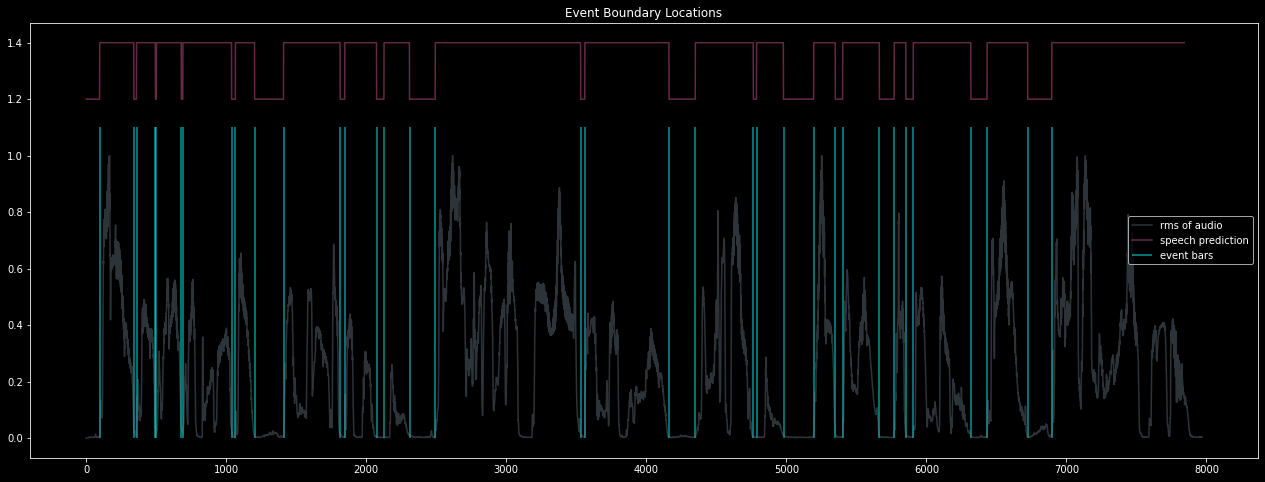

[ 0.          0.14222222  0.49632653  0.52390023  0.71981859  0.72997732
  0.98829932  1.00426304  1.50929705  1.54848073  1.74730159  2.04770975
  2.63401361  2.68190476  3.01133787  3.08825397  3.35238095  3.61941043
  5.12580499  5.1693424   6.04154195  6.31437642  6.91519274  6.94857143
  7.22721088  7.54068027  7.76417234  7.84108844  8.22131519  8.37514739
  8.49560091  8.57251701  9.16897959  9.33732426  9.75818594 10.00780045]


In [12]:
#TODO: Figure out where to do final alignment
y_svr_pred_align = align(y_svr_pred, sw_offset)


# TODO: Move these to a class
def get_interval_idx(bs_in):
    bs = np.pad(bs_in, (1,1), 'edge')
    d = np.diff(bs)
    return np.where(d > 0)[0]


event_rms_idxs = get_interval_idx(y_svr_pred_align)


fig, axs_  = plt.subplots(1, 1, figsize=(22,8), squeeze=False)
axs = axs_[:,0]
axs[0].set_title(f'Event Boundary Locations')
axs[0].plot(X_svr_pts, color='slategray', alpha=0.4, label='rms of audio')
axs[0].plot(align(0.2*y_svr_pred+1.2, sw_offset), color='hotpink', alpha=0.4, label='speech prediction')
axs[0].vlines(event_rms_idxs, 0, 1.1, color='cyan', alpha=0.6, label="event bars")
axs[0].legend(loc='center right')
# axs[0].plot(delta(1*y_svr_pred, y_base, sw_offset, 0), color='cyan', alpha=0.5, label='pred bool - base')
plt.show()


event_t = event_rms_idxs  * (ap.hop_length/ap.sr)
# add start event at t=0
# TODO: add end event at t=? (maybe ok to just add end padding??)
syl_event_t = np.pad(event_t, (1, 0), constant_values=0.0)
print(syl_event_t)

In [35]:
import textgrid


tg_dir = 'data/korean-single-speaker/kss/1'
tg_file = '1_0003.TextGrid'
audio_file = '1_0003.wav'
tg_path = f'{tg_dir}/{tg_file}'
audio_path = f'{tg_dir}/{audio_file}'
tg = textgrid.TextGrid.fromFile(tg_path)

display(tg)
class TextGridder:
    def __init__(self):
        pass


# TODO: This really needs to be a class as it should only be one per file.
import string
from pathlib import Path

def make_textgrid(src):
    ivl_template = string.Template(Path('./template/interval.template').read_text())
    item_template = string.Template(Path('./template/item.template').read_text())
    item_list_template = string.Template(Path('./template/itemlist.template').read_text())
    textgrid_template = string.Template(Path('./template/textgrid.template').read_text())

    item_lists_a = []
    for (item_idx, (item_name, event_t)) in enumerate(src):
        ivls_a = []
        # we're going to be taking pairs of data, so skip the last iteration
        ivls_size = len(event_t) - 1
        for i in range(ivls_size):
            ivl_dict = {
                'ivl_id': i+1,
                'ivl_xmin': event_t[i],
                'ivl_xmax': event_t[i+1],
                'ivl_text': ''
            }
            ivls_a.append(ivl_template.substitute(ivl_dict))

        ivls = '\n'.join(ivls_a)

        item_dict = {
            'item_name': item_name,
            'item_xmin': min(event_t),
            'item_xmax': max(event_t),
            'item__intervals_size': ivls_size,
            'item__intervals': ivls
        }
        item = item_template.substitute(item_dict)

        item_list_dict = {
            'item_list_id': item_idx+1,
            'item_list__items': item
        }
        item_lists_a.append(item_list_template.substitute(item_list_dict))

    item_lists = '\n'.join(item_lists_a)
    textgrid_dict = {
        'textgrid_xmin': min(event_t),
        'textgrid_xmax': max(event_t),
        'textgrid_size': len(item_lists_a),
        'textgrid__item_list': item_lists
    }
    textgrid = textgrid_template.substitute(textgrid_dict)
    print(textgrid)

textgrid_src = [('syl', syl_event_t)]
make_textgrid(textgrid_src)


TextGrid(None, [IntervalTier(char, [Interval(0.0, 0.08071, 0), Interval(0.08071, 0.12089, ᄀ), Interval(0.12089, 0.15231, ᅳ), Interval(0.15231, 0.20956, ᄂ), Interval(0.20956, 0.30481, ᅳ), Interval(0.30481, 0.48924, ᆫ), Interval(0.48924, 0.75129, 0), Interval(0.75129, 0.88808, 아), Interval(0.88808, 0.94573, ᄂ), Interval(0.94573, 1.02123, ᅢ), Interval(1.02123, 1.06647, ᄅ), Interval(1.06647, 1.15844, ᅳ), Interval(1.15844, 1.23614, ᆯ), Interval(1.23614, 1.24294, ᄆ), Interval(1.24294, 1.39564, ᅡ), Interval(1.39564, 1.4555, ᆭ), Interval(1.4555, 1.5327, 이), Interval(1.5327, 1.75352, 아), Interval(1.75352, 1.78153, ᄁ), Interval(1.78153, 1.83571, ᅵ), Interval(1.83571, 1.97293, ᆫ), Interval(1.97293, 1.98396, ᄃ), Interval(1.98396, 2.1979, ᅡ), Interval(2.1979, 2.30753, 0)]), IntervalTier(syl, [Interval(0.0, 0.08071, 0), Interval(0.08071, 0.15231, 그), Interval(0.15231, 0.48924, 는), Interval(0.48924, 0.75129, 0), Interval(0.75129, 0.88808, 아), Interval(0.88808, 1.02123, 내), Interval(1.02123, 1

File type = "ooTextFile"
Object class = "TextGrid"

xmin = 0.0
xmax = 10.00780045351474
tiers? <exists>
size = 1
item []:
    item [1]:
        class = "IntervalTier"
        name = "syl"
        xmin = 0.0
        xmax = 10.00780045351474
        intervals: size = 35
        intervals [1]:
            xmin = 0.0
            xmax = 0.14222222222222222
            text = ""
        intervals [2]:
            xmin = 0.14222222222222222
            xmax = 0.4963265306122449
            text = ""
        intervals [3]:
            xmin = 0.4963265306122449
            xmax = 0.5239002267573696
            text = ""
        intervals [4]:
            xmin = 0.5239002267573696
            xmax = 0.7198185941043084
            text = ""
        intervals [5]:
            xmin = 0.7198185941043084
            xmax = 0.7299773242630385
            text = ""
        intervals [6]:
            xmin = 0.7299773242630385
            xmax = 0.9882993197278912
            text = ""
        intervals 

In [85]:
import math
from keras.preprocessing.sequence import pad_sequences
from scipy import stats
from sklearn.utils import shuffle


audio_dict = {}

def t_to_samps(sr, t):
    return int(math.ceil(t * sr))

def calc_dist_to_stop(wav, sr, stop_times):
    # index to track the current stop_time
    stop_idx = 0
    dist_to_stop = np.zeros(wav.shape).astype(int)
    for i in range(wav.shape[0]):
        dist = t_to_samps(sr, stop_times[stop_idx]) - i
        if dist < 0:
            stop_idx += 1
            dist = t_to_samps(sr, stop_times[stop_idx]) - i
        if dist < 0:
            raise Exception('Unable to calculate distace t next stop time')
        dist_to_stop[i] = dist
    return dist_to_stop

X = np.array([])
y = np.array([])
sr = None
for fn in audio_files:
    wav, sr = librosa.load(fn)
    # wav = np.pad(wav, int(window_size_s*sr), 'edge')
    dist_to_stop = calc_dist_to_stop(wav, sr, syl_event_stop_dict[fn])
    # audio_dict[fn] = {'sr': sr, 'wav': wav, 'dist_to_stop': dist_to_stop}
    X = np.concatenate([X, wav])
    sr = sr
    y = np.concatenate([y, dist_to_stop])
X=X.flatten()
print(X.shape)
print (y.shape)



Level 1:tensorflow:Registering FakeQuantWithMinMaxArgs (<function _FakeQuantWithMinMaxArgsGradient at 0x136a88f70>) in gradient.
Level 1:tensorflow:Registering FakeQuantWithMinMaxVars (<function _FakeQuantWithMinMaxVarsGradient at 0x1371d9f70>) in gradient.
Level 1:tensorflow:Registering FakeQuantWithMinMaxVarsPerChannel (<function _FakeQuantWithMinMaxVarsPerChannelGradient at 0x136a8c0d0>) in gradient.
Level 1:tensorflow:Registering QuantizeAndDequantizeV4 (<function _QuantizeAndDequantizeV4Grad at 0x1371e40d0>) in gradient.
Level 1:tensorflow:Registering QuantizeAndDequantizeV4Grad (<function _QuantizeAndDequantizeV4GradGrad at 0x1371e4280>) in gradient.
Level 1:tensorflow:Registering TensorListConcatLists (None) in gradient.
Level 1:tensorflow:Registering TensorListElementShape (None) in gradient.
Level 1:tensorflow:Registering TensorListLength (None) in gradient.
Level 1:tensorflow:Registering TensorListPushBackBatch (None) in gradient.
Level 1:tensorflow:Registering TensorListPush

(255015,)
(255015,)


NameError: name 'X' is not defined

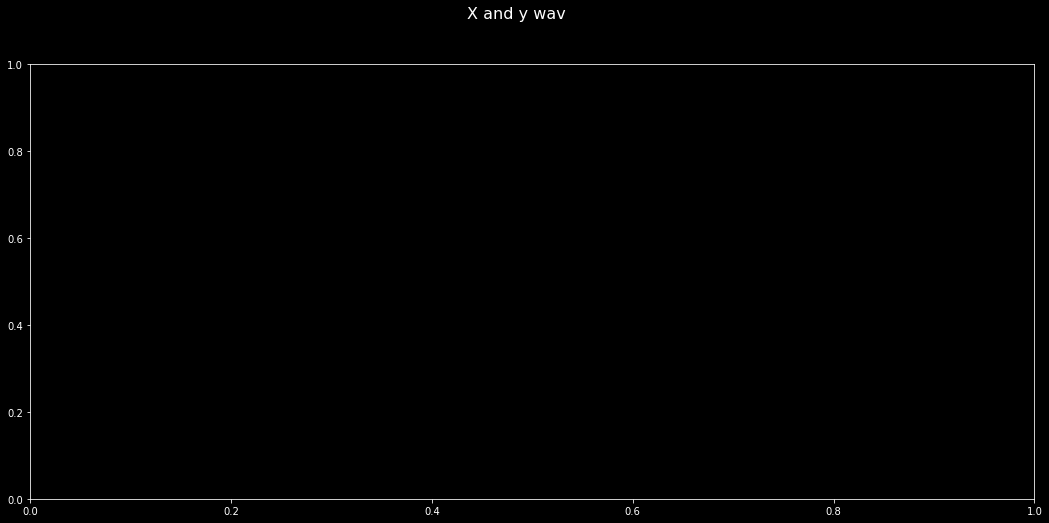

In [176]:
#
fig, ax1  = plt.subplots(figsize=(18,8))
fig.suptitle('X and y wav', fontsize=16)
# ax1.plot(np.max(X, axis=0))
ax1.plot(X, color='tab:blue', alpha=0.6)
ax2 = ax1.twinx()
ax2.plot(y, color='tab:red', alpha=1)
# ax1.scatter(x_, np.concatenate(X), alpha=1)
# ax1.scatter(x_, y-0.5, alpha=0.25)
plt.show()


## CNN Model

In [90]:

from keras.models import Sequential
from keras import layers

from keras.optimizers import RMSprop

print(X.shape)
print(y.shape)
seq_length = int(math.ceil(window_size_s * sr))
truncate_by = X.shape[0] % seq_length
X = X[0:-truncate_by]
y[0:-truncate_by]
print(truncate_by)
print(seq_length)
print(X.shape)
print(y.shape)

(255015,)
(255015,)
3645
6615
(251370,)
(255015,)


In [91]:
from keras.optimizers import Adam

num_features = 1
X = X.reshape(-1, seq_length, 1)
print(X.shape)
print(y.shape)

#parameters
kernel_size = 8
batch_size = 256
epochs = 40
# optimizer=RMSprop(lr=1e-4)
# optimizer='rmsprop'
optimzer = Adam(learning_rate=1e-4)
strides=16


model = Sequential()
# model.add(layers.Embedding(X.shape[0], kernel_size, input_length=input_length))
model.add(layers.Conv1D(1024, kernel_size, activation='relu', strides=strides, input_shape=(seq_length, num_features)))
model.add(layers.AveragePooling1D(24))
model.add(layers.Conv1D(2048, kernel_size, activation='relu', strides=strides))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mean_absolute_error', 'acc'])

history = model.fit(X, y,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)


(38, 6615, 1)
(255015,)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 413, 1024)         9216      
_________________________________________________________________
average_pooling1d_16 (Averag (None, 17, 1024)          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 1, 2048)           16779264  
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2049      
Total params: 16,790,529
Trainable params: 16,790,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 3s 3s/step - loss: 3138.5000 - me

RNN Model

In [ ]:
# # Parameters
# timesteps = 8
# # optimizer=RMSprop(lr=1e-4)
# optimizer='rmsprop'
#
#
# # Model Input
# features = X.shape[1]
# input_shape = (timesteps, features)
#
# model = Sequential()
# model.add(layers.LSTM(32, input_shape=input_shape, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
#
# model.summary()
#
# model.compile(optimizer=optimizer,
#               loss='binary_crossentropy',
#               metrics=['acc'])
#
# history = model.fit(X, y,
#                     epochs=10,
#                     batch_size=16,
#                     validation_split=0.2)

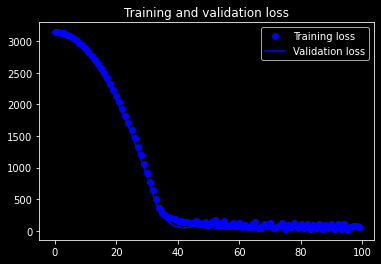

In [67]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
#
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
# print(X)
X_test = X[[15, 25]]
print(X_test.shape)
y_test = model.predict_classes(X_test)
#
# print(y_test.reshape(1,-1))

print(y_test.shape)
print(y_test)

(2, 6615, 1)
(2, 1)
[[1]
 [1]]


/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


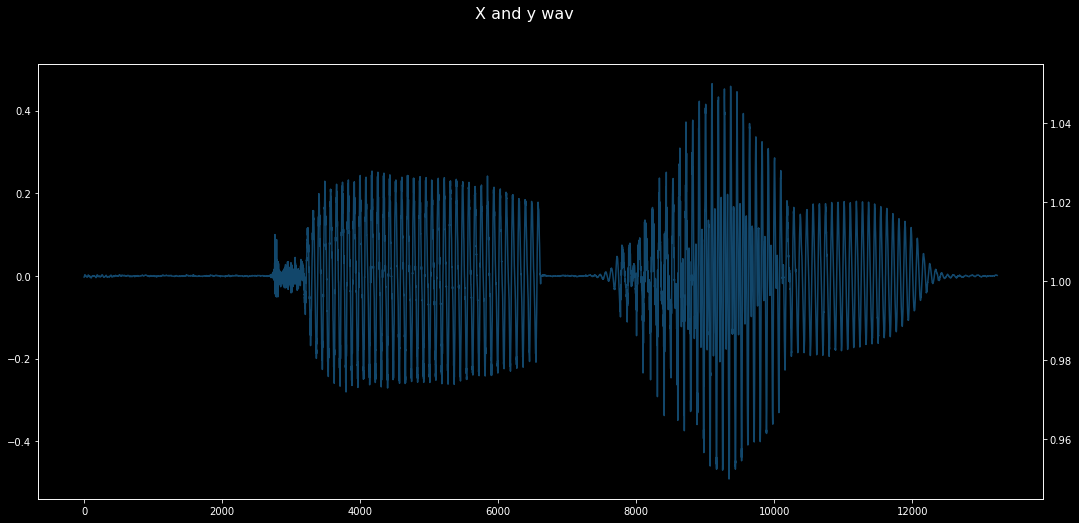

In [71]:
fig, ax1  = plt.subplots(figsize=(18,8))
fig.suptitle('X and y wav', fontsize=16)
# ax1.plot(np.max(X, axis=0))
ax1.plot(X_test.flatten(), color='tab:blue', alpha=0.6)
ax2 = ax1.twinx()
ax2.plot(y_test.flatten(), color='tab:red', alpha=1)
# ax1.scatter(x_, np.concatenate(X), alpha=1)
# ax1.scatter(x_, y-0.5, alpha=0.25)
plt.show()




In [ ]:
# data_files = chunk_char_df['audio'].unique()
# sr_ = None
# audio_ = None
# for wv in data_files:
#     fn = f'{wv}'
#     print(f'Data file to analyze: {fn}')
#     print(f'current sample rate: {sr_}')
#     new_audio_, new_sr_ = librosa.load(fn)
#     print(f"latest sample rate: {new_sr_}")
#     print(f'new_audio_ shape: {new_audio_.shape}')
#     if sr_ is None:
#         sr_ = new_sr_
#     else:
#         assert(new_sr_ == sr_)
#
#     if audio_ is None:
#         audio_ = new_audio_
#     else:
#         audio_ = np.concatenate((audio_, new_audio_))
#     print('new audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(new_audio_), np.max(new_audio_)))
#     print('full audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(audio_), np.max(audio_)))
#
#
#
#
#
# ap = AudioPrep(sr_, 0.75)
# print(ap.size)
# _b = ap.resize(audio_)
#
# print(_b.shape)
#
# fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,4), tight_layout=True)
# fig.suptitle('Waveforms', fontsize=16)
# ax1.set_title(f'librosa ({sr_})')
# ax1.plot(audio_)

In [ ]:
# def find_nearest_event(t, event_list):
#     event_dists = abs(event_list - t)
#     nearest_event_idx = np.argmin(event_dists)
#     return event_list[nearest_event_idx]

# def a_round(val):
#     return round(val, 6) if isinstance(val, float) else val
#
# def create_audio_df(event_dict, filenames):
#     df_dict = {
#         'i_start': [],
#         'i_stop': [],
#         'i_midpoint': [],
#         'nearest_event': [],
#         'audio_dur': [],
#         'audio': []
#     }
#     for fn in filenames:
#         dur = event_dict[fn]['dur']
#         ptr = 0.0
#
#         while ptr < dur:
#             w_start = ptr
#             w_stop = ptr + window_size_s
#             w_midpoint = w_start + (w_stop - w_start)/2
#
#             nearest = find_nearest_event(w_midpoint, event_dict[audio_file]['events'])
#             # offset = nearest - w_midpoint
#             # offset_is_in_window = abs(offset) > window_size_s / 2
#             # event_offset_val = offset if offset_is_in_window  else None
#
#             df_dict['i_start'].append(a_round(w_start))
#             df_dict['i_stop'].append(a_round(w_stop))
#             df_dict['i_midpoint'].append(a_round(w_midpoint))
#             df_dict['nearest_event'].append(a_round(nearest))
#             # df_dict['event_offset'].append(a_round(event_offset_val))
#             df_dict['audio_dur'].append(dur)
#             df_dict['audio'].append(fn)
#
#             ptr = a_round(ptr + window_stride_s)
#
#     audio_df = pd.DataFrame.from_dict(df_dict)
#     audio_df['evt_dist'] = audio_df['nearest_event'] - audio_df['i_midpoint']
#     audio_df['valid_event'] = audio_df['evt_dist'].abs() < (window_size_s / 2)
#     return audio_df

# audio_char_df = create_audio_df(char_event_dict, audio_files)
# print(audio_char_df['valid_event'].value_counts())
# display(audio_char_df)
# print('----')
# audio_syl_df = create_audio_df(syl_event_dict, audio_files)
# print(audio_syl_df['valid_event'].value_counts())
# display(audio_syl_df)

In [ ]:
# print(audio_dict['data/korean-single-speaker/kss/1/1_0000.wav'])
# print(audio_dict['data/korean-single-speaker/kss/1/1_0003.wav'])
# def pr_stats(a):
#     # stats_a = stats.describe(a)
#     print(f'shape: {a.shape}')
#     print(f'global max: {np.amax(a)}')
#     print(f'global min: {np.amin(a)}')
#     print(f'global mean: {np.mean(a)}')
#     print(f'global median: {np.median(a)}')
#
# def ls_of_a_stats(a):
#     types = [type(ls) for ls in a]
#
#     print(f'Outer Type: {type(a)}')
#     print(f'Inner Types: {set(types)}')
#
#     print(f'Outer Len: {len(a)}')
#     shapes = [ls.shape for ls in a]
#     print(f'Inner Shapes: {set(shapes)}')
#
#     # stats_ls = [stats.describe(ls) for ls in a]
#     # print(f'stats: {set(stats_ls)}')
#
# def pad_trunc(a, size):
#     # print(f'pad_trunc input, a shape: {a.shape}, fix to size: {size}')
#     if len(a) < size:
#         pad_size = size - len(a)
#         a = np.pad(a, pad_size, 'edge')
#     if len(a) > size:
#         a = a[0:size]
#     # print(f'pad_trunc output, a shape: {a.shape}')
#     return a
#
# class AudioPrep:
#
#     def __init__(self, wav, sr, pad_s=(0,0)):
#             self.sr = sr
#             self.pad_samps = tuple(map(self.t_to_samps, pad_s))
#             self.wav = np.pad(wav, self.pad_samps, 'edge')
#
#     def t_to_samps(self, t):
#             return int(math.ceil(t * self.sr))
#
#     # ivls is numpy array of  [start, stop] timestamps
#     def slice_by_time(self, ivls):
#         idxs = (ivls * self.sr).astype(int)
#         slices = np.asarray([self.wav[rs[0]:rs[1]] for rs in idxs])
#         # [print([pr_stats(slice) for slice in slices])]
#         return slices
#
#     def samps_to_next_event(self, event_times):
#         event_idxs = (event_times * self.sr).astype(int)
#         print(event_idxs.shape)
#         print(event_idxs)
#
# def get_ivls_np(audio_df, f):
#     return audio_df[audio_df['audio'] == f][['i_start', 'i_stop']].values
#
# def get_events_np(audio_df, f):
#     return audio_df[audio_df['audio'] == f][['i_stop']]
#
# def get_X(audio_wav_dict, audio_df, f):
#     print(audio_df[audio_df['audio'] == f].head())
#     events = get_events_np(audio_char_df, f)
#     # print(f'{f} events: {events}')
#     ap = AudioPrep(audio_wav_dict[f]['wav'], audio_wav_dict[f]['sr'], (0,window_size_s))
#     # ap.samps_to_next_event(events)
#     ivs = get_ivls_np(audio_df, f)
#     return ap.slice_by_time(ivs)
#
# nested_x = [get_X(audio_dict, audio_char_df, fn) for fn in audio_files]
#
#
# x_ls = [val for x_partial in nested_x for val in x_partial]
# ls_of_a_stats(x_ls)
#
# x_shapes = np.asarray([x_.shape for x_ in x_a ])
#
#
# X = pad_sequences(x_a, padding='post', dtype='float32')
# pr_stats(X)
# # X = (X - np.min(X))/np.ptp(X)
# # print(f'X shape: {X.shape}')
#
#
# y = audio_char_df['valid_event'].values.astype(float)
# print (f'y shape: {y.shape}')
#
#
# # pr_stats(X)
# # X, y = shuffle(X, y, random_state=42)
# #

# # nested_stats(X)
